In [1]:
# softmax có thể hiểu là đưa vào tập dữ liệu X thì sẽ cho ra xác xuất xuất hiện của các class trong tập X

In [3]:
# kết quả khi tập dữ liệu đi qua linear model được gọi là logit (z), softmax sẽ được tính là e^z thứ i/tổng e^z

In [4]:
# khi đi qua softmax thu được các xác suất thì cho đi qua làm loss để tối ưu như (rmse, cross-entropy...)

In [6]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import tensorflow as tf

In [8]:
# Data loading
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/mnist', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [9]:
X_train = mnist.train.images
X_val = mnist.validation.images
X_test =mnist.test.images

In [10]:
y_train = mnist.train.labels
y_val = mnist.validation.labels
y_test =mnist.test.labels

In [11]:
X_train.shape

(55000, 784)

In [12]:
y_train.shape

(55000, 10)

In [14]:
# nó có 10 chiều vì đã chuyển thành dạng onehot encoder

In [76]:
#placeholder
X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [77]:
# variable - biến sử dụng để trainning
W = tf.Variable(tf.zeros([784,10]))
# vì W sẽ nhân vs X để ra y nên có shape [784,10]
b = tf.Variable(tf.zeros([10]))

In [78]:
#Model hyperparameter
learning_rate = 0.01
batch_size = 128
number_epochs = 100

In [89]:
# Define graph
logits = tf.add(tf.matmul(X, W), b)
y_pred = tf.nn.softmax(logits=logits)

In [90]:
# loss func
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss = tf.reduce_mean(entropy)

# vì đang ở onehot nên sử dụng argmax() để kiểm tra accuarancy
correct_preds = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))

In [91]:
# Accuarancy
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

In [92]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [93]:
# Init Variables
init =  tf.global_variables_initializer()

In [94]:
sess= tf.Session()
sess.run(init)

In [95]:
# training
# đây là số lượng batch chúng cần phải học trên 1 epoch
number_batch = X_train.shape[0] // batch_size
for i in range(number_epochs):
    for _ in range(number_batch):
        X_batch , y_batch = mnist.train.next_batch(batch_size=batch_size)
        _, batch_loss = sess.run([optimizer, loss], feed_dict = {X: X_batch, y: y_batch})
    if i % 10 == 0:
        _, val_loss, val_accuracy = sess.run([optimizer, loss, accuracy], feed_dict = {X: X_val, y: y_val})
        print("Epoch {} val_loss={} accuracy={}".format(i, val_loss, val_accuracy))

Epoch 0 val_loss=0.840487003326416 accuracy=0.8393999934196472
Epoch 10 val_loss=0.37884852290153503 accuracy=0.8981999754905701
Epoch 20 val_loss=0.3345491588115692 accuracy=0.9101999998092651
Epoch 30 val_loss=0.315172404050827 accuracy=0.9139999747276306
Epoch 40 val_loss=0.30392158031463623 accuracy=0.9157999753952026
Epoch 50 val_loss=0.29616397619247437 accuracy=0.91839998960495
Epoch 60 val_loss=0.2906186580657959 accuracy=0.9211999773979187
Epoch 70 val_loss=0.28638362884521484 accuracy=0.9225999712944031
Epoch 80 val_loss=0.28296706080436707 accuracy=0.9233999848365784
Epoch 90 val_loss=0.2802596390247345 accuracy=0.9241999983787537


In [96]:
_, test_loss, test_accuracy = sess.run([optimizer, loss, accuracy], feed_dict = {X: X_test, y: y_test})
print("Epoch {} val_loss={} accuracy={}".format(i, test_loss, test_accuracy))

Epoch 99 val_loss=0.28291839361190796 accuracy=0.9204999804496765


In [102]:
import matplotlib.pyplot as plt

def show_result(X_true, y_true):
    plt.imshow(X_true.reshape(28, 28))
    print(np.argmax(y_true))
    y_preds = sess.run(y_pred, feed_dict={X : [X_true]})
    
    print(np.argmax(y_preds))

6
6


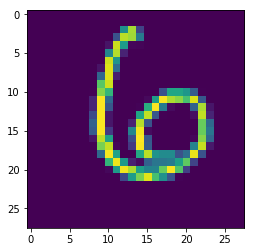

In [103]:
show_result(X_test[100], y_test[100])